In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
df_train = pd.read_csv('../input/black-friday/train.csv')
df_test = pd.read_csv('../input/black-friday/test.csv')

In [3]:
df_train.head().append(df_train.tail())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [4]:
df_train[df_train.Product_ID == 'P00248942']


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
126,1000024,P00248942,F,26-35,7,A,3,1,1,6.0,14.0,15774
405,1000068,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,11429
516,1000093,P00248942,M,26-35,17,B,1,1,1,6.0,14.0,11754
701,1000135,P00248942,M,18-25,4,C,1,1,1,6.0,14.0,19146
...,...,...,...,...,...,...,...,...,...,...,...,...
542905,1005595,P00248942,M,26-35,20,B,1,0,1,6.0,14.0,15466
544481,1005813,P00248942,M,26-35,7,A,1,1,1,6.0,14.0,15192
545091,1005915,P00248942,M,18-25,4,C,0,0,1,6.0,14.0,19653
545123,1005916,P00248942,M,51-55,20,B,1,1,1,6.0,14.0,11954


In [5]:
print(df_train[df_train.Product_ID == 'P00248942']['Purchase'].min(),df_train[df_train.Product_ID == 'P00248942']['Purchase'].max())

3880 19701


In [6]:
print(df_train[df_train.Product_ID == 'P00371644']['Purchase'].min(),df_train[df_train.Product_ID == 'P00371644']['Purchase'].max())

118 613


Product ID seems like an important parameter that would influence a purchase behavior. as purchases for different demographics are in the same range when "P00248942" was compared to a product ID "P00371644"

In [7]:
df_train[df_train['Product_ID'].isin(df_train['Product_ID'].unique()[1:10])]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
545722,1006010,P00184942,M,36-45,0,C,1,0,1,8.0,17.0,19131
545745,1006014,P00085442,M,46-50,1,C,0,1,12,14.0,NaN,1747
545798,1006021,P0097242,M,26-35,12,B,2,1,1,16.0,NaN,19358
545832,1006028,P0097242,M,18-25,4,A,4+,0,1,16.0,NaN,19682


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


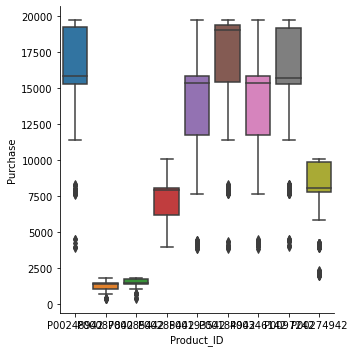

In [8]:
#To confirm this,we plot a box plot for the first 10 Product IDs
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(x="Product_ID", y = "Purchase",data =df_train[df_train['Product_ID'].isin(df_train['Product_ID'].unique()[1:10])], kind="box")
plt.show()

In [9]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
#Creating a new feature in test df
df_test['Multi_category_availability'] = 1+np.where(df_test['Product_Category_2'].isnull(), 0, 1 )+np.where(df_test['Product_Category_3'].isnull(), 0, 1 )
df_test['Multi_category_availability'].value_counts()

2    90218
1    72344
3    71037
Name: Multi_category_availability, dtype: int64

In [11]:
df_total = df_train.append(df_test)
df_total

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Multi_category_availability
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,NaN
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,1.0
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,2.0
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,3.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,2.0


In [12]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
df_total.replace({'Age':{'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},
                   'Stay_In_Current_City_Years':{'4+':5}},inplace = True)

In [14]:
df_total.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
5    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
df_total = pd.concat([df_total,pd.get_dummies(df_total[['Gender','City_Category']])],axis='columns')

In [16]:
#Setting Stay in current years as int as it was an object type previouly
df_total['Stay_In_Current_City_Years'] = df_total['Stay_In_Current_City_Years'].astype(int) 

In [17]:
#As our algorithms do not take string input, we need to convert Product ID to int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_total['Product_ID'] = le.fit_transform(df_total['Product_ID'])


In [18]:
df_train = df_total[df_total['Purchase'].notnull()]
df_test =  df_total[df_total['Purchase'].isnull()]
df_train.append(df_test.head())

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Multi_category_availability,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,684,F,1,10,A,2,0,3,NaN,NaN,8370.0,NaN,1,0,1,0,0
1,1000001,2406,F,1,10,A,2,0,1,6.0,14.0,15200.0,NaN,1,0,1,0,0
2,1000001,868,F,1,10,A,2,0,12,NaN,NaN,1422.0,NaN,1,0,1,0,0
3,1000001,844,F,1,10,A,2,0,12,14.0,NaN,1057.0,NaN,1,0,1,0,0
4,1000002,2769,M,7,16,C,5,0,8,NaN,NaN,7969.0,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1000004,1216,M,5,7,B,2,1,1,11.0,NaN,NaN,2.0,0,1,0,1,0
1,1000009,1063,M,3,17,C,0,0,3,5.0,NaN,NaN,2.0,0,1,0,0,1
2,1000010,2799,F,4,1,B,5,1,5,14.0,NaN,NaN,2.0,1,0,0,1,0
3,1000010,1379,F,4,1,B,5,1,4,9.0,NaN,NaN,2.0,1,0,0,1,0


In [19]:
#invalidating if there is nulls in product_category2 and 3
df_train.fillna(-1,inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
df_train.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
Purchase                       0
Multi_category_availability    0
Gender_F                       0
Gender_M                       0
City_Category_A                0
City_Category_B                0
City_Category_C                0
dtype: int64

In [21]:
df_test = df_test.drop('Purchase',axis=1).fillna(-1)

In [22]:
#checking if NaN were removed
df_test.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
Multi_category_availability    0
Gender_F                       0
Gender_M                       0
City_Category_A                0
City_Category_B                0
City_Category_C                0
dtype: int64

In [23]:

X_train, X_test, y_train = df_train.drop(['Purchase','Gender','City_Category'],axis=1),df_test.drop(['Gender','City_Category'],axis=1),df_train['Purchase']

In [24]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost

k_fold= KFold(n_splits= 4, random_state= 42)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [25]:
from tqdm import tqdm_notebook
algos1= {
        'Decision Tree Regressor' : {'model' : DecisionTreeRegressor(),
                                    'para' : {'criterion': ['mse'],
                                             'splitter': ['random'],'min_samples_split':[2,5,10,7]}
                                    },
        
        'Random Forest Regressor' : {'model' : RandomForestRegressor(),
                                     'para' :{'criterion' : ['mse'],'max_depth' : [1,5,7],
                                              'n_estimators':[50,100],
                                              'max_features': ['auto']}
                                    }
        
        }
score1=[]
for algo, param in tqdm_notebook(algos1.items()):
    grid1= GridSearchCV(param['model'], param['para'], cv= k_fold)
    grid1.fit(X_train,y_train) 
    y_pred= grid1.predict(X_test)
    
    score1.append(pd.Series({
                'Estimator' : algo,
                'best parameter' : grid1.best_params_,
                'best score' : grid1.best_score_
                }))

#         objective='reg:squarederror
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
score1

[Estimator                                   Decision Tree Regressor
 best parameter    {'criterion': 'mse', 'min_samples_split': 10, ...
 best score                                                 0.599996
 dtype: object,
 Estimator                                   Random Forest Regressor
 best parameter    {'criterion': 'mse', 'max_depth': 7, 'max_feat...
 best score                                                 0.665977
 dtype: object]

We then select the best scoring algorithm and the parameter to make prediction and we use the fresh algorithm with full set